## Regression

El precio del móvil depende de varios factores, como la resolución, la marca, el tamaño, el peso, la calidad de imagen, la memoria RAM, la batería y la potencia de la CPU. En este conjunto de datos, queremos estimar el precio de los teléfonos móviles que utilizan las funciones anteriores.

  



### Realiza un estudio comparativo de los modelos de regresión lineal simple y regresión lineal múltiple (aplicando métodos de selección de variables).

Importamos las librerías

In [76]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



Cargamos el dataset

In [77]:
dataset = pd.read_csv("../data/Cellphone.csv")

In [78]:
dataset.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


Preprocesado de datos

In [79]:
dataset.isna().mean()

Product_id      0.0
Price           0.0
Sale            0.0
weight          0.0
resoloution     0.0
ppi             0.0
cpu core        0.0
cpu freq        0.0
internal mem    0.0
ram             0.0
RearCam         0.0
Front_Cam       0.0
battery         0.0
thickness       0.0
dtype: float64

In [80]:
dataset.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [81]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})

#sns.distplot(dataset['Price'], bins=30)
#plt.show()

Vemos las correlaciones entre variables.

In [82]:
correlation_matrix = dataset.corr().round(2)

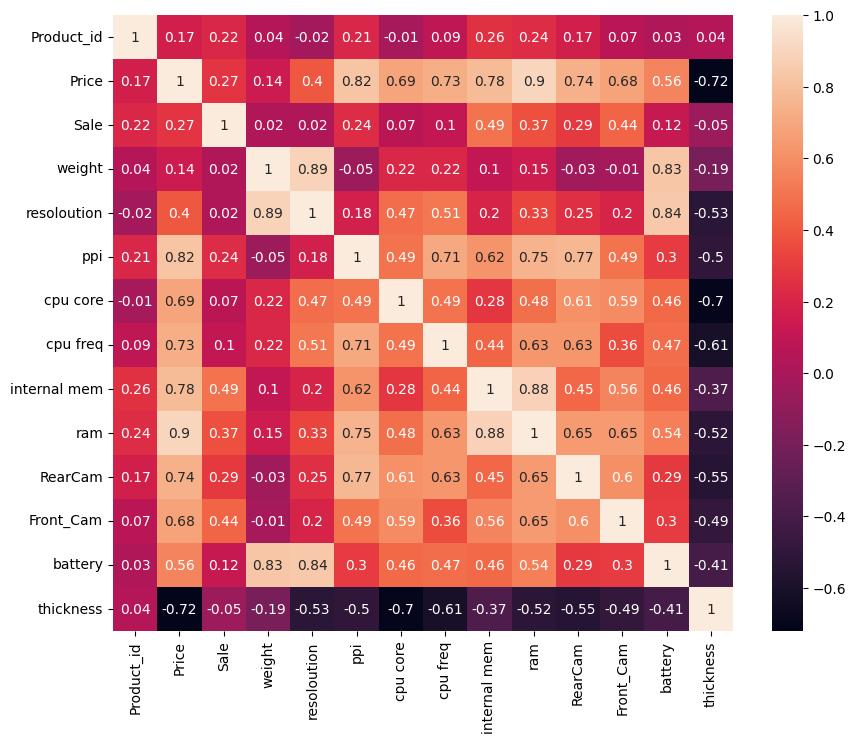

In [83]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [84]:
X = pd.DataFrame(dataset['ram'], columns = ['ram'])
Y = dataset['Price']

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(128, 1)
(33, 1)
(128,)
(33,)


# Selección de variables

In [86]:
def r2_adj(y_pred, X_test, r2):
    N = y_pred.shape[0]
    p = X_test.shape[1]
    k = (1-r2)
    w = (N-1)/(N-p-1)
    adj_r2 = 1-(k*w)
    
    return adj_r2

In [87]:
dataset = pd.read_csv("../data/Cellphone.csv")

In [88]:
X = dataset.drop(["Price", "Product_id"], axis = 1)
Y = dataset['Price']

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(128, 12)
(33, 12)
(128,)
(33,)


In [91]:
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df = pd.DataFrame(X_test, columns = X.columns)

In [92]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [93]:
import math

#Declaramos el dataframe que recogerá los resultados
dataset_seleccion = pd.DataFrame()
#inicializamos el bucle for que irá desde 1 hasta el número de variables más 1
for i in range(1, len(X_train_df.columns)+1):
    #declaramos la función de selección de variables pasándole el modelo, el número de variables y la dirección
    sbs = SFS(DecisionTreeRegressor(random_state = 0), k_features = i, forward = False)
    #entrenamos la selección de variables
    sbs.fit(np.array(X_train), y_train)
    #declaramos nuestro modelo de regresión lineal
    regression = DecisionTreeRegressor(random_state = 0)
    #generamos una variable para guardar las columnas seleccionadas
    columnas = [X_train_df.columns[int(index)] for index in list(sbs.k_feature_idx_)]
    #entrenamos el modelo de regresión
    regression.fit(X_train_df[columnas], y_train)
    #hacemos la predicción sobre X_test con las columnas seleccionadas
    y_pred = regression.predict(X_test_df[columnas])
    #Calculamos r2
    r2 = r2_score(y_test, y_pred)
    #Calculamos r2 ajustado
    adj_r2 = r2_adj(y_pred, X_test_df[columnas], r2)
    #calculames el rmse 
    rmse = math.sqrt(mean_squared_error(y_test, y_pred))
    mse = math.sqrt(mean_squared_error(y_test, y_pred))
    #calculamos el mae
    mae = mean_absolute_error(y_test, y_pred)
    #montamos el fataframe de resultados de la iteración en la que nos encontramos
    df_res = pd.DataFrame({"variables": [columnas], "r2_adj": adj_r2, "rmse": rmse, "mae": mae, "mse":mse})
    #concatenamos los resultados al dataframe inicial
    dataset_seleccion = pd.concat([dataset_seleccion, df_res], ignore_index = True)

In [94]:
dataset_seleccion.sort_values(by = "rmse", ascending = True, ignore_index = True)

,variables,r2_adj,rmse,mae,mse
0,"[ppi, cpu freq, ram, thickness]",0.982517,92.378503,38.515152,92.378503
1,"[ppi, ram, thickness]",0.979572,101.624234,49.060606,101.624234
2,"[weight, ppi, cpu core, cpu freq, internal mem...",0.965180,120.699602,53.727273,120.699602
3,"[ppi, cpu freq, ram, RearCam, thickness]",0.968452,121.858338,55.818182,121.858338
4,"[Sale, weight, resoloution, ppi, cpu core, cpu...",0.960880,122.489703,54.393939,122.489703
5,"[ppi, cpu freq, internal mem, ram, RearCam, th...",0.966522,123.183652,56.151515,123.183652
6,"[Sale, weight, ppi, cpu core, cpu freq, intern...",0.960261,126.229589,59.484848,126.229589
7,"[weight, ppi, cpu freq, internal mem, ram, Rea...",0.961050,130.290119,63.696970,130.290119
8,"[ppi, ram]",0.956962,150.028355,89.666667,150.028355
9,"[Sale, weight, resoloution, ppi, cpu core, cpu...",0.928336,161.974839,68.090909,161.974839


In [95]:
dataset_seleccion_rmse = dataset_seleccion.sort_values(by = "rmse", ascending = True, ignore_index = True)

In [96]:
X = dataset[dataset_seleccion_rmse["variables"][0]]

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(112, 4)
(49, 4)
(112,)
(49,)


In [98]:
regression = DecisionTreeRegressor(random_state = 0)
regression.fit(X_train, Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [99]:
# model evaluation for training set

y_train_predict = regression.predict(X_train)
rmse = math.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = regression.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(Y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.0
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 183.59582939551916
R2 score is 0.9330587019376619


In [100]:
from sklearn import tree

In [101]:
X.columns

Index(['ppi', 'cpu freq', 'ram', 'thickness'], dtype='object')

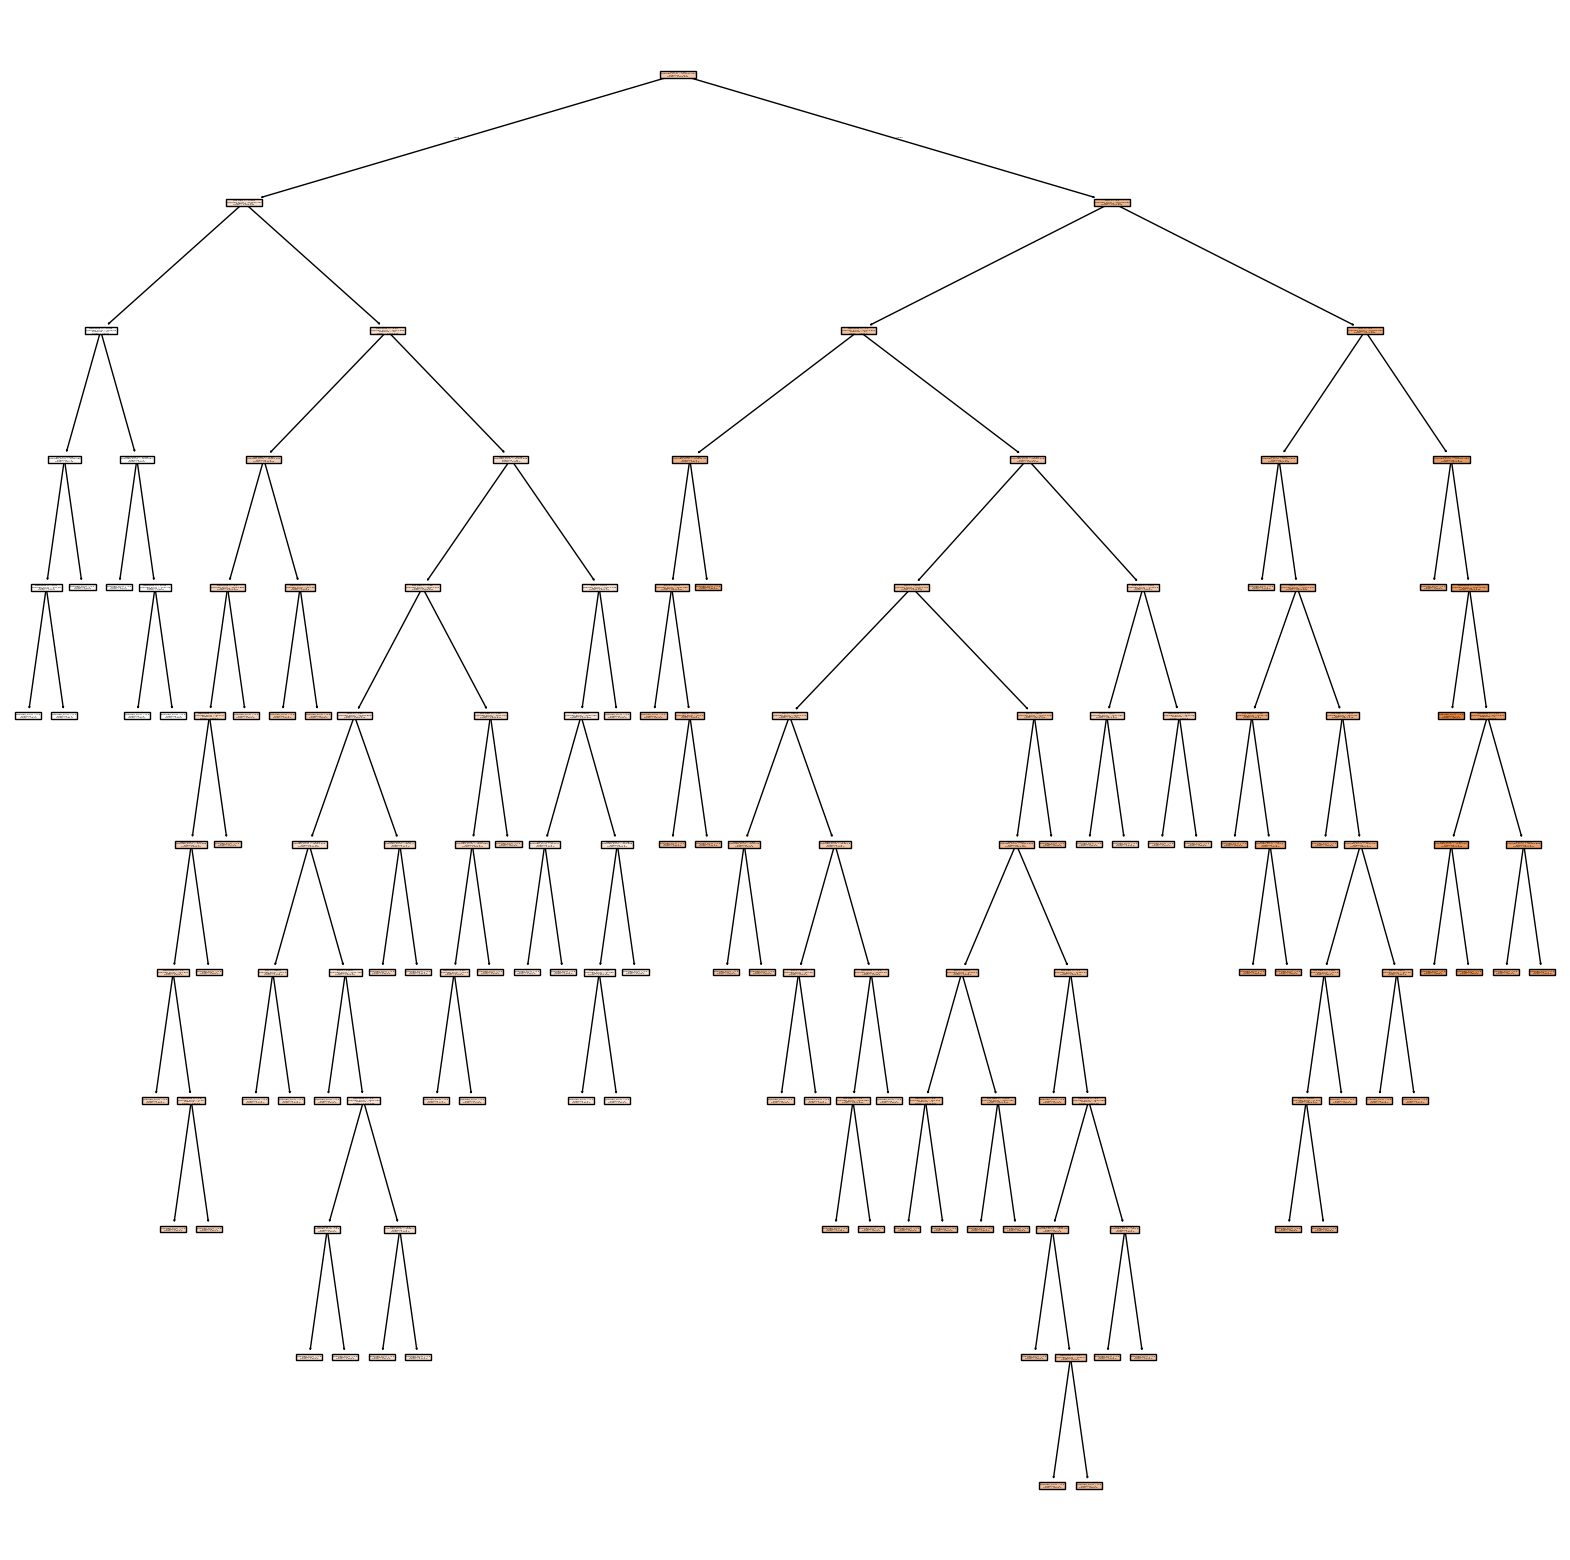

In [102]:
fig = plt.figure(figsize= (20, 20))
_ = tree.plot_tree(regression,
                      feature_names = X.columns,
                      class_names = ["Price"],
                      filled = True)

In [103]:
regression = DecisionTreeRegressor(random_state = 0)
regression.fit(X_train, Y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [104]:
# model evaluation for training set

y_train_predict = regression.predict(X_train)
rmse = math.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = regression.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(Y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.0
R2 score is 1.0


The model performance for testing set
--------------------------------------
RMSE is 183.59582939551916
R2 score is 0.9330587019376619


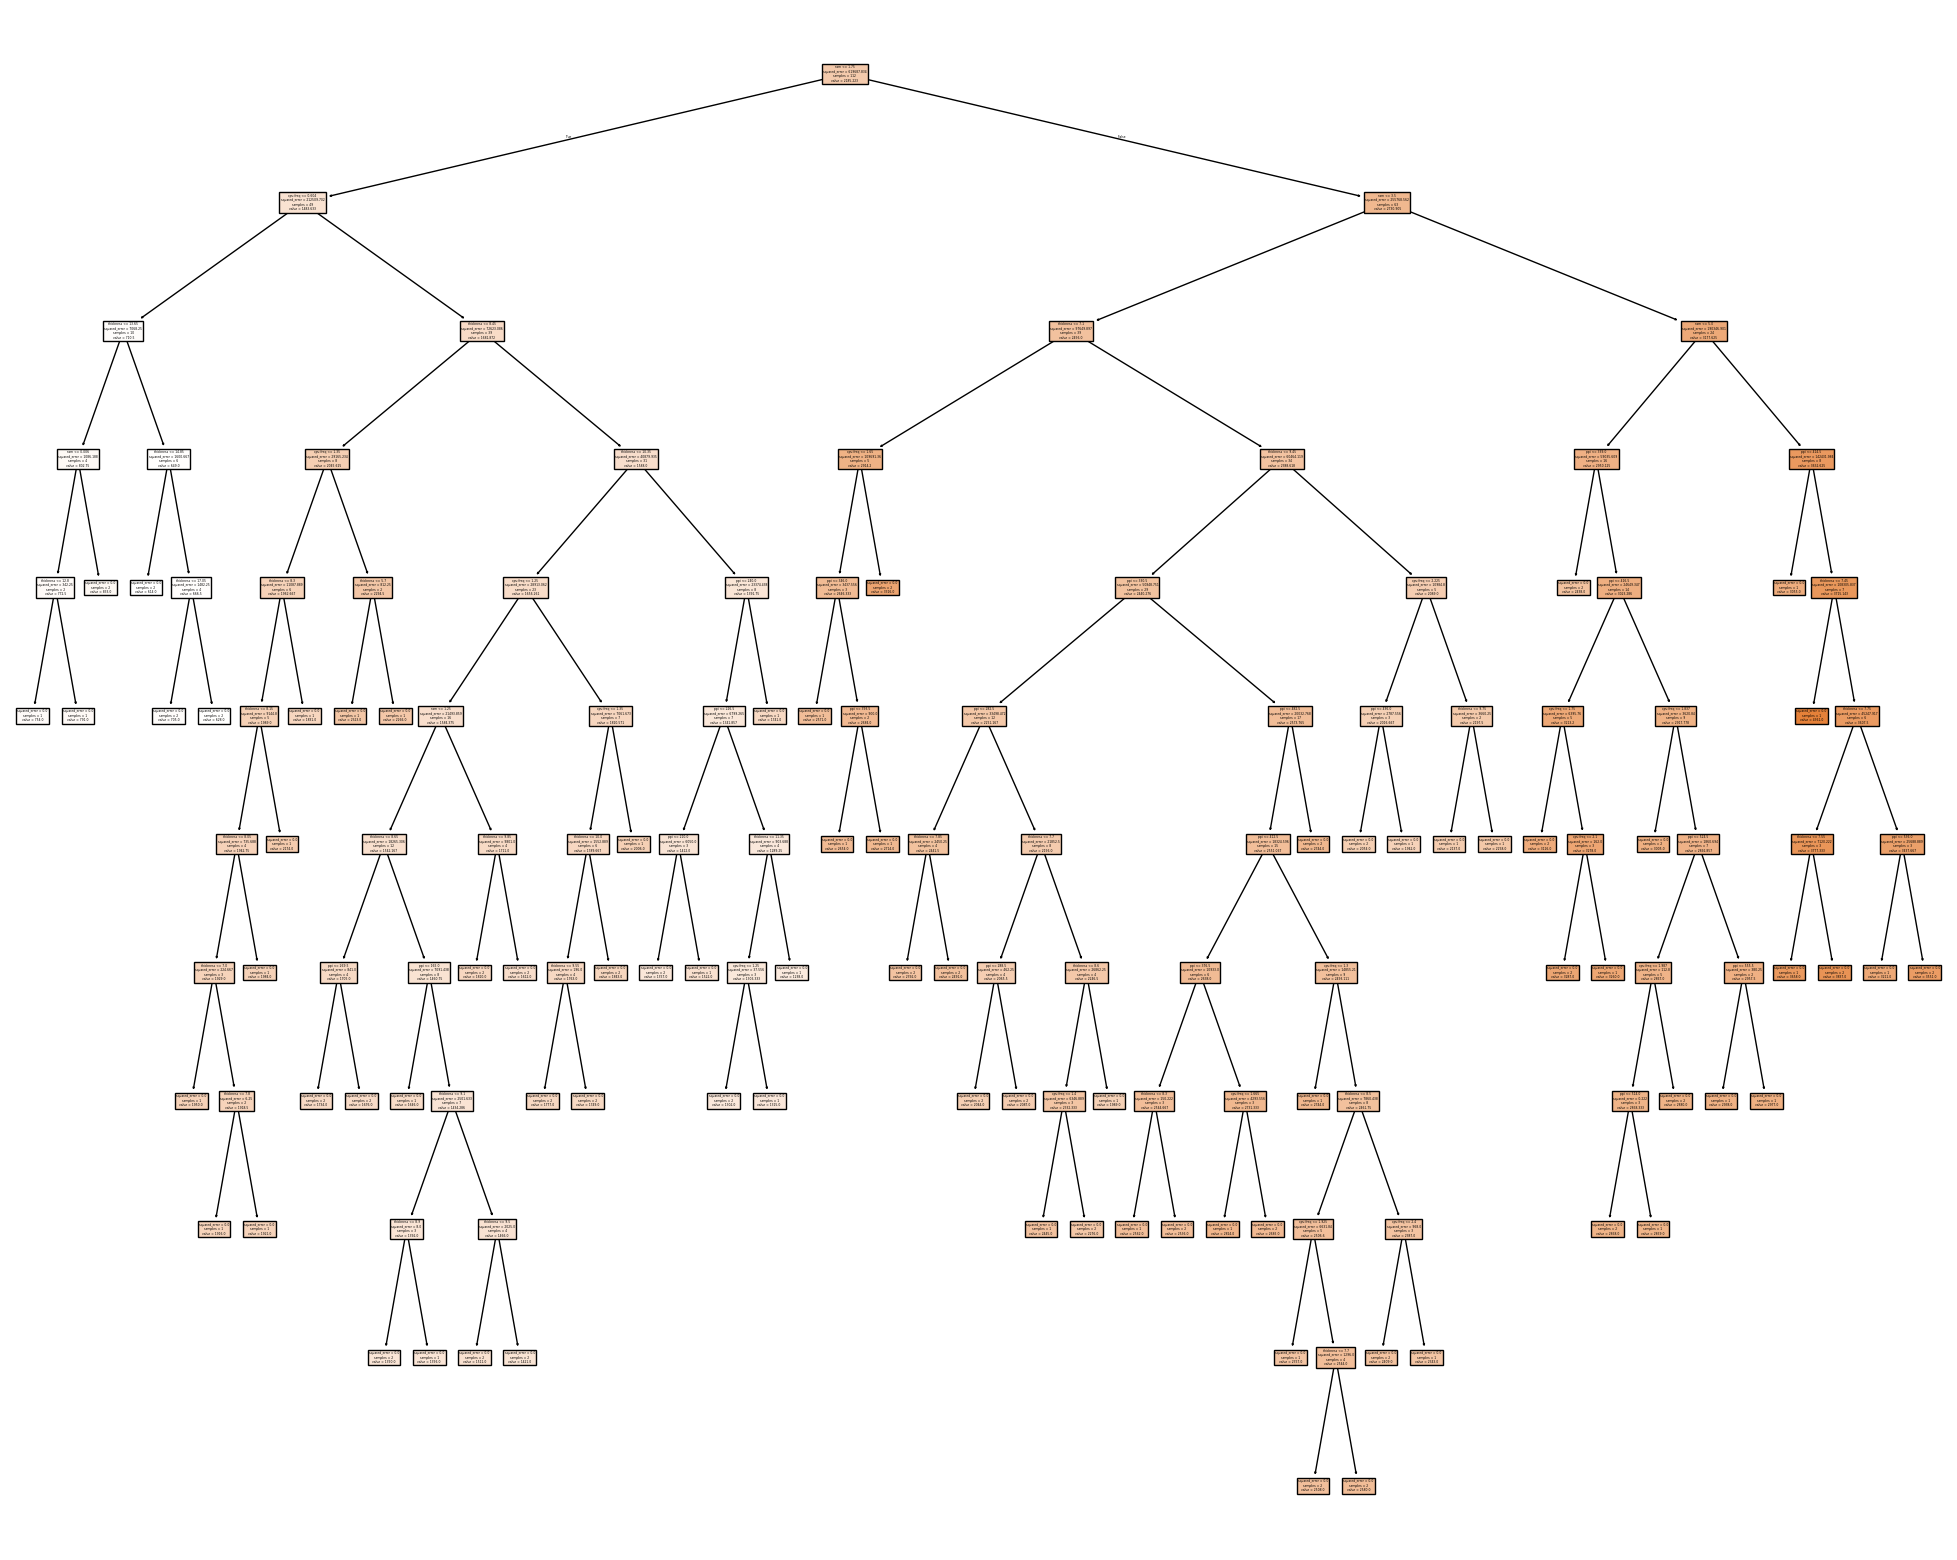

In [105]:
fig = plt.figure(figsize= (25, 20))
_ = tree.plot_tree(regression,
                      feature_names = X.columns,
                      class_names = ["Price"],
                      filled = True)

In [106]:
parameters = {'min_samples_split': [10, 20, 40, 60, 80, 100],
                  'min_samples_leaf': [5, 10, 15, 20],
                  'max_depth': [4, 6, 8, 10]
                 }

In [107]:
from sklearn.model_selection import GridSearchCV
grid_tree = GridSearchCV(estimator=regression, param_grid = parameters)

In [108]:
grid_tree.fit(X_train, Y_train)

,estimator,DecisionTreeR...andom_state=0)
,param_grid,"{'max_depth': [4, 6, ...], 'min_samples_leaf': [5, 10, ...], 'min_samples_split': [10, 20, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [109]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_tree.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_tree.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_tree.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 DecisionTreeRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                      random_state=0)

 The best score across ALL searched params:
 0.884370767853236

 The best parameters across ALL searched params:
 {'max_depth': 8, 'min_samples_leaf': 5, 'min_samples_split': 10}


In [110]:
# model evaluation for training set

y_train_predict = grid_tree.predict(X_train)
rmse = math.sqrt(mean_squared_error(Y_train, y_train_predict))
r2 = r2_score(Y_train, y_train_predict)


print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = grid_tree.predict(X_test)
# root mean square error of the model
rmse = math.sqrt(mean_squared_error(Y_test, y_test_predict))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 184.54016354179925
R2 score is 0.945044794998636


The model performance for testing set
--------------------------------------
RMSE is 248.76662440212812
R2 score is 0.8770997594643342


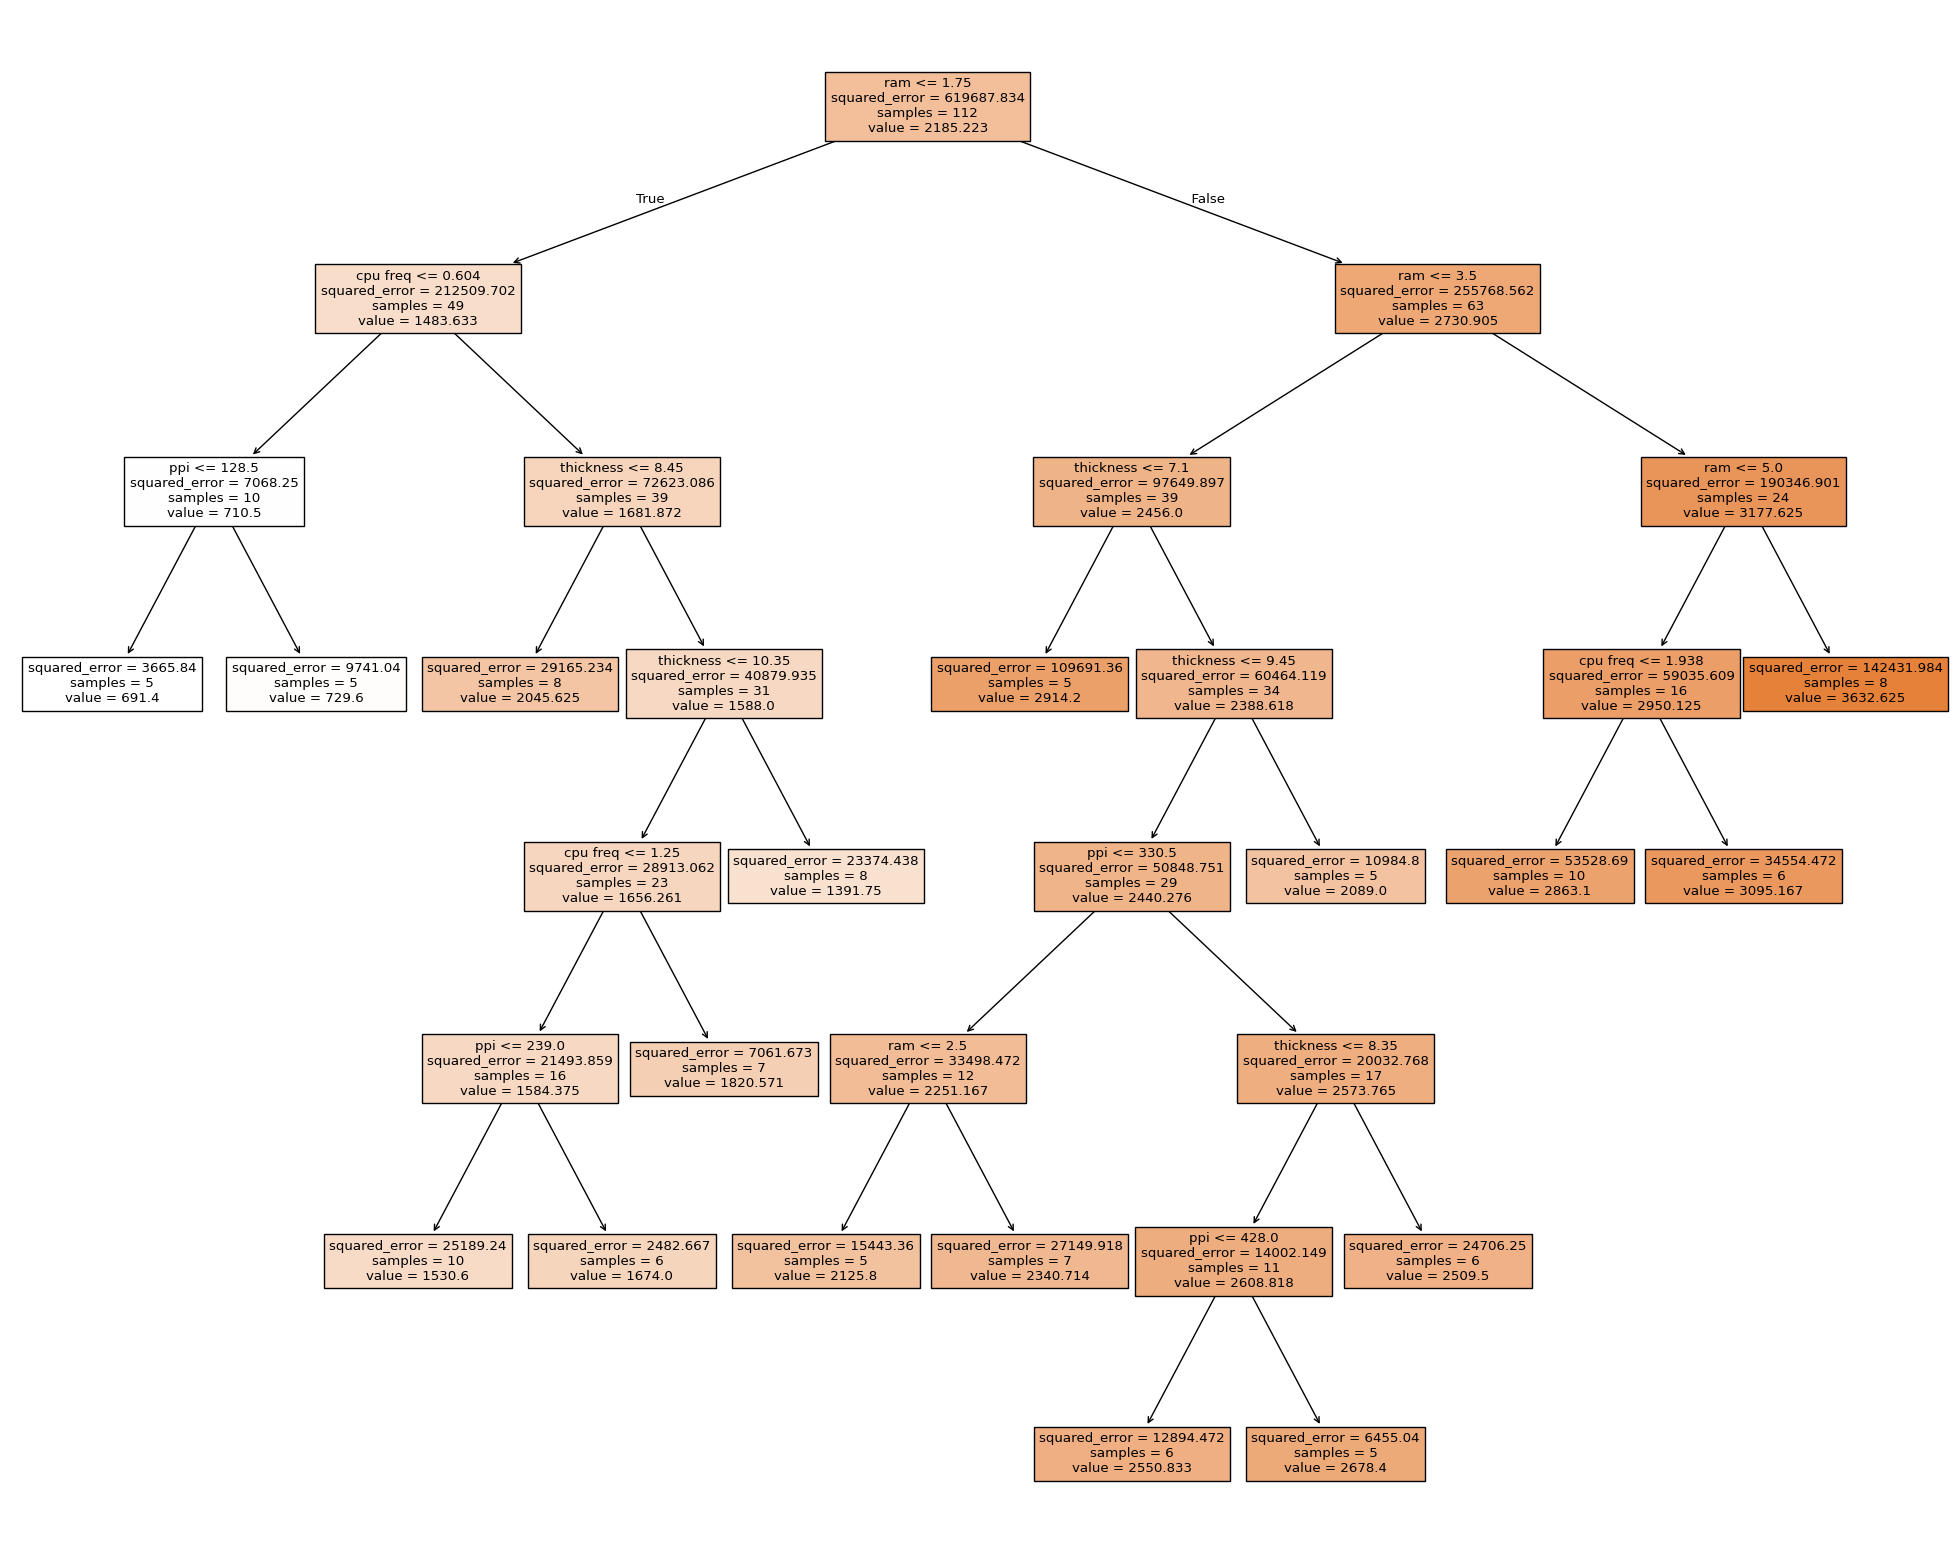

In [111]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(grid_tree.best_estimator_, 
                   feature_names=X.columns,  
                   class_names=["SalePrice"],
                   filled=True)